# NOTE: the notes below are incomplete and will be updated and expanded before the workshop

# Morning: Introduction to Time Series Analysis

In this set of exercises we study the basic concepts of statistical time series. Time series is a big topic, and one thing to note is a statistical time series course places somewhat different emphasis than a time series data analysis class from a science department, at least in the basics. Here we assume you understand the basic goals of statistics in terms of estimating unknown quantites from data and characterize their uncertainty.

To get started, we will first clear our R workspace:

In [26]:
rm(list=ls())      #remove data from workspace
library(nlme)      #pacakge to fit statistical models with autocorrelation

## Is there a trend?
Here we read in our first dataset, a univariate time series of average sea surface temepratures (SSTs) for the region in enclosed within XXX, originating from the NOAA monitoring website. We define the dataset ``sst``, our variable of interest ``y`` which is the raw SST measurement, and the time variable ``t`` which has resolution according to the number of datapoints. This was a quick way of defining the time variable because I know there is no missing data. If missing data are present then we would have to spend a little more time to make sure our time variable is how we want it. We then go ahead and plot the data in R. 

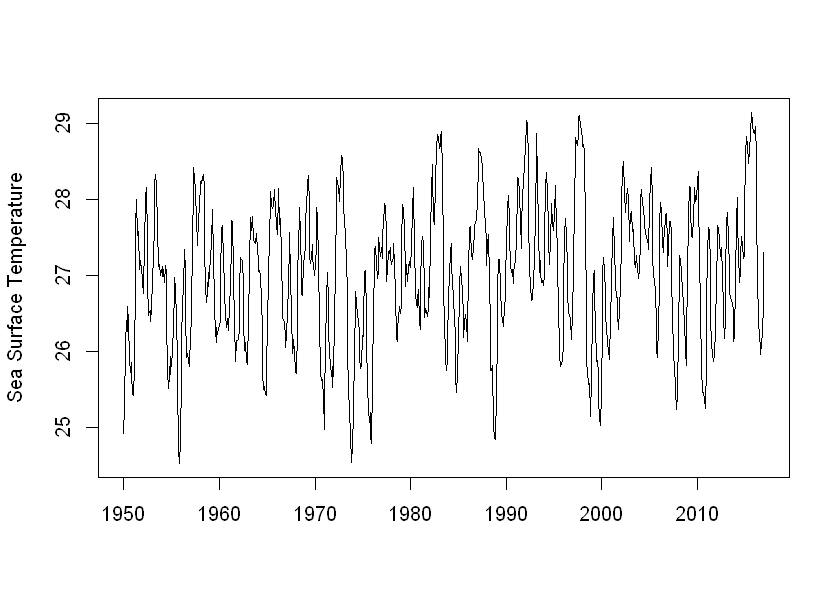

In [27]:
sst <- read.table('../../Data/detrend.nino34.ascii.txt',header=TRUE)  #read monitoring data published to NOAA website
y   <- sst$TOTAL                                          #define vector for SST measurement
t   <- seq(1950,2017,length.out=nrow(sst))                #define time variable [float vector]
options(repr.plot.width=7, repr.plot.height=5)            #define dimensions of jupyter plot window
plot(t,y,type='l',xlab='',ylab='Sea Surface Temperature') #make plot as a line

Now we would like to estimate the trend and evaluate the uncertainty in this unknown quantity. The code below fits the linear regression model model

$$ y_i = \beta t_i + e_i $$

where $y_i$ indicates is a single observation which is predicted by the *trend parameter* $\beta$ multiplied by the time elapsed $t$ with some statistical error in the prediction $e_i$ that we assume are *Normally*(or *Gaussian*) *distributed*, also written as $e_i \sim N(0,\sigma^2)$ where $\sigma^2$ is the variance of the Normal distribution. As will be helpful later, we can write the model in vector notation  

$$ \mathbf{y} = \beta \mathbf{t} + \mathbf{e} $$

where the bold-faced type indicates the full vector, or column, of values, with $\mathbf{t}$ representing the set of sequentially increasing time values, and $\mathbf{e}$ is a *random vector* with *covariance matrix* $\mathbf{\Sigma}$. The covariance matrix will be a key component to modeling the differences between independent and autocorrelation data. Briefly for now, if all the data are independent (uncorrelated), the covariance matrix is a diagonal matrix with no zero off-diagonal values. And further, if we assume each value has the same variance, we have what is known as an *independent and indentically distributed random variable*, or *iid*. In this case we can write the covariance matrix as follows

$$ \mathbf{\Sigma}_{iid} = \begin{bmatrix}
	  	\sigma^2 &        0 &  \dots & 0 \\
  			   0 & \sigma^2 &   \dots & \vdots \\
          \vdots &   \vdots &\ddots & 0  \\
               0 &        0 &\dots  & \sigma^2     \end{bmatrix} $$
               

In ``R`` we fit the *iid* regression model using the almighty ``lm()`` command. The ``summary()`` command around it tells ``R`` to print the summary of the model fit.

In [28]:
summary(lm(y ~ t))   #return summary of the fitted model object lm(y~t)


Call:
lm(formula = y ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4020 -0.6441  0.0608  0.6246  1.9709 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.688845   3.290339   3.249  0.00121 ** 
t            0.008230   0.001659   4.961 8.55e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9125 on 805 degrees of freedom
Multiple R-squared:  0.02967,	Adjusted R-squared:  0.02846 
F-statistic: 24.61 on 1 and 805 DF,  p-value: 8.551e-07


## Generate sample realizations
Below we try some simulations to build an intuition for what it means for a dataset to represtn a *stochastic realization* of a statistical process. Perhaps the most fundamental statistical time series model is the *first-order autoregressive model*, or *AR1*. This seemingly complicated term is actually pretty easy to conceptually understand. The *first-order* means we model data as depending on the single data point previously, while *autoregressive* means that points are predicted as a simple regression of the time point previous. We write this model

$$ y_{t+1} = \alpha y_t + e_t  $$

where now we are using $y$ to refer to a general time series, here shown at individual time points $t+1$ or $t$, $e_t$ is a Normal random variance as used before, while $\alpha$ is the *autoregressive coefficient* which can take values anywhere on the interval $(-1,1)$, with values . This is a simple time series model but it exhibits many of the fundamental properties encountered in time series generally. And in fact, the *AR1* model often serves well as an approximation for a wider class of more complicated models. The main characteristic of this model is in its *autocorrelation*. Fundamentally, values nearer to one another are more similar than values further away. This will be a key concept throughout the time series and spatial analysis sections. We'll see that autocorrelation generates uch larger *random* flucuations that need to be treated when statistically analyzing data. 

The code below generates sample realizations of the stochastic process defined by the ``rnorm()`` command. The ``rnorm(n,mean,sd)`` takes the size of the realization as its first arguement, the mean of the normal distribution as its second, and the standard deviation as its third.

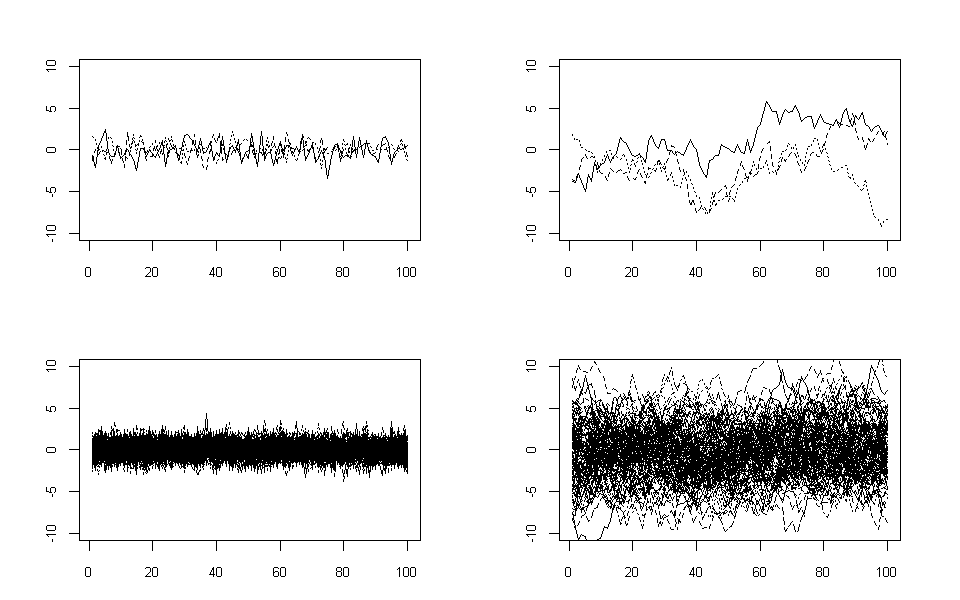

In [56]:
n <- 100
a <- 0.95
s <- 1

options(repr.plot.width=8, repr.plot.height=5)      #set dimensions of jupyter plot window
X1 <- replicate(3,rnorm(n,sd=s))
X2 <- replicate(3,arima.sim(100,model=list(ar=a,sd=s)))
X3 <- 
par(mfrow=c(2,2),mar=c(3,4,3,3),cex.axis=0.8)       #set matrix layout c(2,2), margin width, and axis label size of R plots
	matplot(replicate(3,rnorm(n,sd=s)),           #iid process; 3 realizations; matplot() plots columns of matrix simultaneouly, replicate() generates matrix with the given sample realizations as its columns
            type='l',ylab='',xlab='',col='black',ylim=c(-10,10))     
	matplot(replicate(3,arima.sim(100,model=list(ar=a,sd=s))),      #autoregressive model with autoregressive coefficient 0.95; 3 realizations
            type='l',ylab='',xlab='',col='black',ylim=c(-10,10))
	matplot(replicate(100,rnorm(100)),                            #iid process; 100 realizations
            type='l',ylab='',xlab='',col='black',ylim=c(-10,10))
	matplot(replicate(100,arima.sim(100,model=list(ar=a))),    #autoregressive; 100 realizations
            type='l',ylab='',xlab='',col='black',ylim=c(-10,10))


### Exercise
In the cell below, try altering the *ar*, and *s* parameters to see how the parameters alter the characteristic flucuations of the time series. Remember, there is nothing going on in these time series except for random noise and autocorrelation.

## The autocorrelation function
The autocorrelation function is way we describe autocorrelation in time series and spatial data and is the central concept in the course. In general we will write the autocorrelation as

$$ c(x_t,x_{t+\tau}) = \mathrm{cor}(x_t,x_{t+\tau}) $$

where the \mathrm{cor}() represents the familiar *Pearson correlation coefficient* which takes on values $[-1,1]$. 

In [36]:
sst <- read.table('../../Data/detrend.nino34.ascii.txt',header=TRUE) #download sea surface temperature monitoring data from NOAA website
y   <- sst$TOTAL      #extract the observed sst and store it as variable y
n   <- length(y)      #extract the number of observations

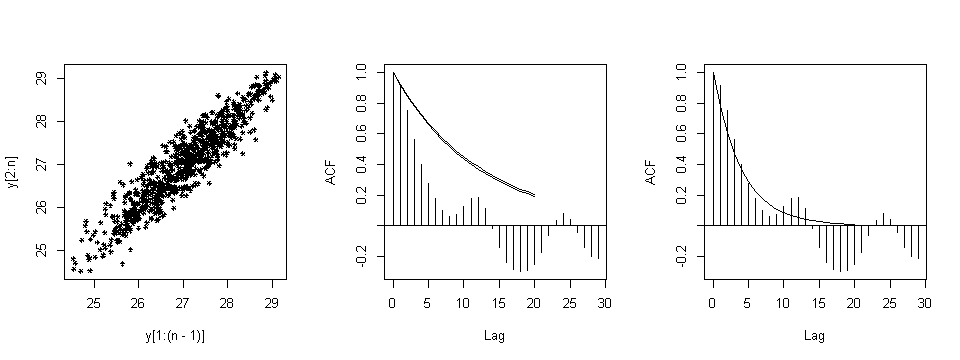

In [37]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,3))                                                  #set the plot matrix layout c(1,2)
plot(y[1:(n-1)],y[2:n],pch=8,cex=0.5)                              #scatterplot with values lagged by 1 unit
alpha_hat1 <- cor(y[1:(n-1)],y[2:n])                               #the correlation coefficient between lagged values
alpha_hat2 <- summary(lm(y[2:n] ~ y[1:(n-1)]))$coefficients[2,1]   #the linear slope between lagged values
acf(y,demean=TRUE,ci=0,main='',type='correlation')                 #estimate and plot the empirical autocorrelation function
lines(seq(0,20),alpha_hat1^seq(0,20))                              #add line for threoretical acf using correlation coefficient
lines(seq(0,20),alpha_hat2^seq(0,20))                              #add line for threoretical acf using slope
acf(y,demean=TRUE,ci=0,main='',type='correlation')                 #estimate and plot the empirical autocorrelation function
lines(seq(0,20),0.78^seq(0,20))                                    #plot the optimized autocorrelation function (more info below)

## Generate various time series structures

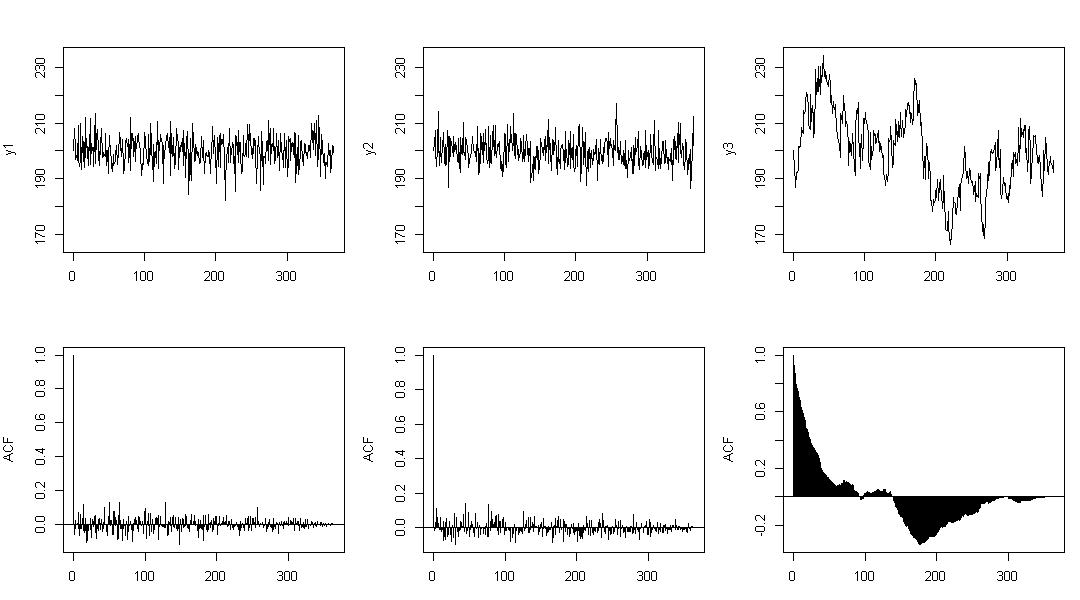

In [38]:
rm(list=ls())
y0       <- 20       #intercept value
a        <- 0.9      #autocorrelation/autoregressive parameter
s        <- 5        #standard deviation of the random increments
b        <- 1        #amplitude of the seasonal cycle
nyrs     <- 1        #number of years in the simulation
T        <- nyrs*365 #number of days
f        <- seq(0,2*pi*nyrs,length.out=T)  #nyrs cycles over the number of days T [radians]
sinf     <- sin(f)                         #sine wave
y1=y2=y3 <- 200                            #initial values

for(i in 2:T){
    y1t1 <- y1[1] + rnorm(1,0,s)                         #'purely random process' (PRP)
    y2t1 <- y2[1] + rnorm(1,0,s) + b*sinf[i]             #PRP with seasonal component
    y3t1 <- y0    + rnorm(1,0,s) + b*sinf[i] + a*y3[i-1] #PRP with seasonal component and autocorrelation
    y1 <- c(y1,y1t1)                                     #extend the time series with new values
    y2 <- c(y2,y2t1)
    y3 <- c(y3,y3t1)
}

options(repr.plot.width=9, repr.plot.height=5)
par(mfrow=c(2,3),mar=c(3,4,3,1))
plot(y1,type='l',ylim=c(range(c(y1,y2,y3))))     #plot each time series with yaxes set by the range of all values
plot(y2,type='l',ylim=c(range(c(y1,y2,y3))))
plot(y3,type='l',ylim=c(range(c(y1,y2,y3))))
acf(y1,lag.max=T,ci=0,main='')                   #estimate and plot the empirical autocorrelation function
acf(y2,lag.max=T,ci=0,main='')
acf(y3,lag.max=T,ci=0,main='')


## Simple trend analysis with autocorrelation

In [39]:
sst <- read.table('http://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt',header=TRUE)  #extract observed sea surface temperature from the NOAA website
y   <- sst$TOTAL                                #extract the observed sea surface temperature
t   <- seq(1950,2017,length.out=nrow(sst))      #define time variable with same number of years as the data 

In [40]:
summary(gls(y ~ t, correlation=corAR1()), method='ML')   #fit a linear regression between y and time, specifying a first order autoregressive covariance matrix. Specify method='ML' to fit exact maximum likelihood  

Generalized least squares fit by REML
  Model: y ~ t 
  Data: NULL 
       AIC      BIC    logLik
  637.1089 655.8723 -314.5545

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.9272067 

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 5.816964 16.795079 0.3463493  0.7292
t           0.010672  0.008467 1.2603950  0.2079

 Correlation: 
  (Intr)
t -1    

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.4783251 -0.6540165  0.1030884  0.6908156  2.0707585 

Residual standard error: 0.9484359 
Degrees of freedom: 807 total; 805 residual

# -----------MORNING BREAK-------------------------------------------

## Analysis of Orange Country ozone time series
## Simple trend analysis

In [41]:
d  <- read.csv('D:/Dropbox/Teaching/Bayes/DSI/Environmental_Stats_with_Stan/Data/ozone_orange.csv',stringsAsFactors=FALSE)
d  <- d[d$year!=2016,]                                     #incomplete chunk of observation, remove for simplicity, using only data before 2016
y1 <- d$ozone                                             #extract the daily mean ozone variable
t  <- seq(min(d$year),max(d$year),length.out=length(y1))   #define time variable

In [42]:
summary(gls(y1 ~ t, correlation=corAR1(), method='ML'))   #display the summary of a fitted regression with autoregressive covariance matrix

Generalized least squares fit by maximum likelihood
  Model: y1 ~ t 
  Data: NULL 
        AIC       BIC   logLik
  -21910.74 -21886.67 10959.37

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.8552849 

Coefficients:
                  Value Std.Error     t-value p-value
(Intercept)  0.03422281 0.6293315  0.05437963  0.9566
t           -0.00000413 0.0003138 -0.01316690  0.9895

 Correlation: 
  (Intr)
t -1    

Standardized residuals:
         Min           Q1          Med           Q3          Max 
-2.056608887 -0.800994961  0.009574762  0.706174031  3.184672958 

Residual standard error: 0.01261744 
Degrees of freedom: 3035 total; 3033 residual

## Harmonic regression

In [43]:
nyrs  	  <- max(d$year)-min(d$year)              #number of seasonal cycles [years]
f         <- seq(0,2*pi*nyrs,length.out=nrow(d))  #nyrs cycles over the length of the time series [radians]
	sinf  <- sin(f)                               #sine wave of f
	cosf  <- cos(f)                               #cose wave of f

In [44]:
summary(gls(y1 ~ sinf + cosf,correlation=corAR1(), method='ML'))   #fit regression with seasonal component and first order autoregressive covariance matrix

Generalized least squares fit by maximum likelihood
  Model: y1 ~ sinf + cosf 
  Data: NULL 
        AIC       BIC   logLik
  -22053.52 -22023.43 11031.76

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.7700548 

Coefficients:
                  Value    Std.Error  t-value p-value
(Intercept) 0.025893952 0.0005036630 51.41126  0.0000
sinf        0.000891778 0.0007113883  1.25357  0.2101
cosf        0.010826465 0.0007096038 15.25706  0.0000

 Correlation: 
     (Intr) sinf  
sinf  0.000       
cosf -0.004  0.000

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.97903286 -0.72563451 -0.03934443  0.67355001  3.73500124 

Residual standard error: 0.0100069 
Degrees of freedom: 3035 total; 3032 residual

## Time series decomposition

In [45]:
fit     <- gls(y1 ~ sinf + cosf + t,correlation=corAR1(), method='ML')  #store the model object from the fit above
k_hat   <- summary(fit)$t                                               #extract fitted regression coefficients
phi_hat <- coef(fit$model$corStruct,unconstrained=FALSE)                #extract fitted autoregressive parameter
e       <- residuals(fit,'response')                                    #extract 'raw' residuals (yi - ypred) 
n       <- length(e)                        

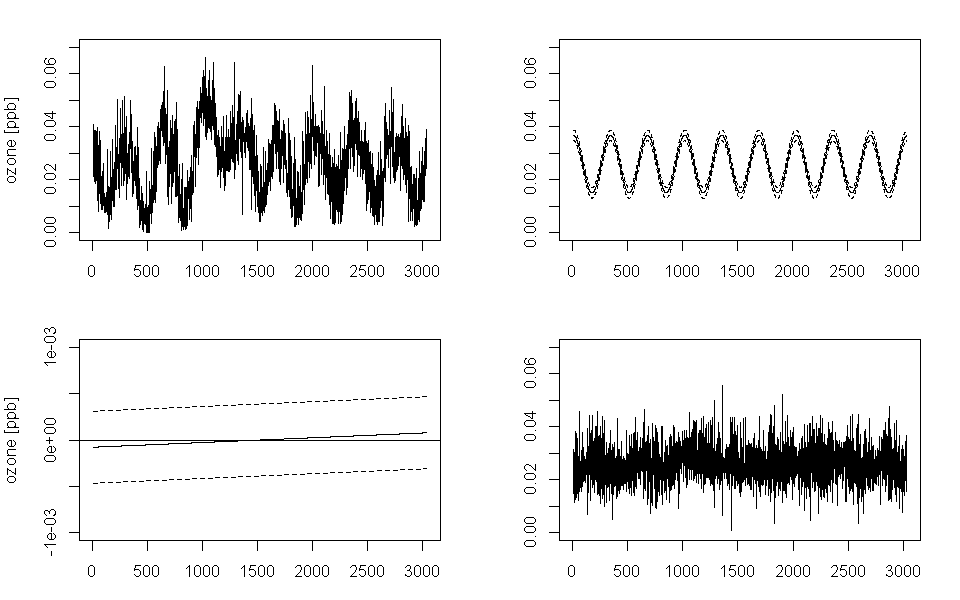

In [46]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(2,2),mar=c(3,4,2,2))
plot(y1,type='l',ylim=c(0,0.07),ylab='ozone [ppb]')                       #plot the data

f_hat <- mean(y1) + k_hat[2,1]*sinf + k_hat[3,1]*cosf                     #fitted seasonal cycle
plot(f_hat,type='l',ylim=c(0,0.07),ylab='')                               #plot fitted seasonal cycle
	lines(f_hat + 2*sqrt(k_hat[2,2]^2 + k_hat[3,2]^2),lty=2)              #add 95% CIs (upper)
	lines(f_hat - 2*sqrt(k_hat[2,2]^2 + k_hat[3,2]^2),lty=2)              #add 95% CIs (lower)

t_hat <- k_hat[1,1] + k_hat[4,1]*t                                        #fitted trend
t_hat <- t_hat - mean(t_hat)                                              #normalize to the zero-line   
plot(t_hat, type='l',ylim=c(-0.001,0.001),ylab='ozone [ppb]')             #plot the values
	lines(t_hat + 2*k_hat[4,2],lty=2)                                     #upper 95% CI
	lines(t_hat - 2*k_hat[4,2],lty=2)                                     #lower 95% CI
	abline(h=0)                                                           #add the zero-line
ear <- e[2:n]-phi_hat*e[1:(n-1)]                                          #subtract the autoregression
plot(mean(y1)+ear,type='l',ylim=c(0,0.07),ylab='')                        #plot the residuals

## Time series regression

In [47]:
x1  <- d$temp      #extract temperature variable
x2  <- d$windsp    #extract wind speed
x3  <- d$winddir   #extract wind direction
fitx1   <- gls(y1 ~ sinf + cosf + x1,correlation=corAR1(), method='ML')    #fit regression with seasonal terms, one input, with autoregressive correlation matrix  
summary(fitx1)     #display summary of the fitted model

Generalized least squares fit by maximum likelihood
  Model: y1 ~ sinf + cosf + x1 
  Data: NULL 
        AIC       BIC   logLik
  -22051.98 -22015.87 11031.99

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.7687963 

Coefficients:
                  Value    Std.Error   t-value p-value
(Intercept) 0.024437725 0.0021696121 11.263638  0.0000
sinf        0.000793210 0.0007218835  1.098807  0.2719
cosf        0.010728155 0.0007200955 14.898239  0.0000
x1          0.000022837 0.0000331050  0.689847  0.4903

 Correlation: 
     (Intr) sinf   cosf  
sinf  0.193              
cosf  0.192  0.039       
x1   -0.973 -0.198 -0.198

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.97991106 -0.72750894 -0.04116506  0.67466560  3.74885029 

Residual standard error: 0.009982415 
Degrees of freedom: 3035 total; 3031 residual

In [48]:
fitx123 <- gls(y1 ~ sinf + cosf + x1 + x2 + x3,correlation=corAR1(), method='ML')   #fit linear regression with seasonal cycle and three independent variables; fit via maximum likelihood method='ML'
summary(fitx123)                                                                    #display the summary of the model

Generalized least squares fit by maximum likelihood
  Model: y1 ~ sinf + cosf + x1 + x2 + x3 
  Data: NULL 
     AIC       BIC  logLik
  -22611 -22562.85 11313.5

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.7868927 

Coefficients:
                   Value    Std.Error   t-value p-value
(Intercept)  0.020406707 0.0021083140  9.679159  0.0000
sinf         0.001603743 0.0007131025  2.248965  0.0246
cosf         0.010199741 0.0007180072 14.205625  0.0000
x1          -0.000111914 0.0000307147 -3.643677  0.0003
x2           0.002810266 0.0001128399 24.904898  0.0000
x3           0.000016128 0.0000034484  4.676984  0.0000

 Correlation: 
     (Intr) sinf   cosf   x1     x2    
sinf  0.179                            
cosf  0.215  0.039                     
x1   -0.895 -0.189 -0.177              
x2   -0.087  0.044 -0.032 -0.166       
x3   -0.324 -0.037 -0.152 -0.012  0.190

Standardized residuals:
        Min          Q1         Med          Q3         Max 

## Model Selection

In [49]:
data.frame(
    model= c('fitx1','fitx123'),                                       #model labels
    R2   = c(cor(y1,predict(fitx1))^2, cor(y1,predict(fitx123))^2),    #percent varation explained by the predictions
    BIC  = c(summary(fitx1)$BIC,       summary(fitx123)$BIC),          #Bayesian information criterion
    k    = c(summary(fitx1)$dims$p,    summary(fitx123)$dims$p))       #number of parameters in the models


model,R2,BIC,k
fitx1,0.3740440,-22015.87,4
fitx123,0.4420161,-22562.85,6


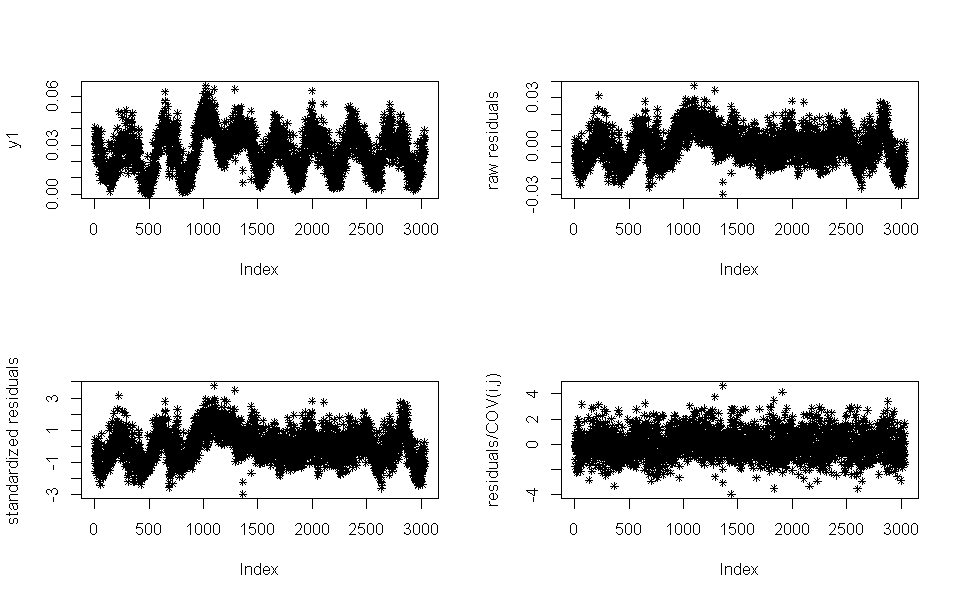

In [50]:
par(mfrow=c(2,2))
plot(y1,pch=8,cex=0.7)
plot(residuals(fitx1, 'response'),pch=8,cex=0.7,ylab='raw residuals')         #'raw' residuals
plot(residuals(fitx1, 'pearson'),pch=8,cex=0.7,ylab='standardized residuals') #normalized to have unit variance
plot(residuals(fitx1, 'normalized'),pch=8,cex=0.7,ylab='residuals/COV(i,j)')  #residuals after removing the autocorrelation